In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Hodrick Prescott Filter

In [2]:
df = pd.read_csv('Data/macrodata.csv',index_col=0,parse_dates=True)
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


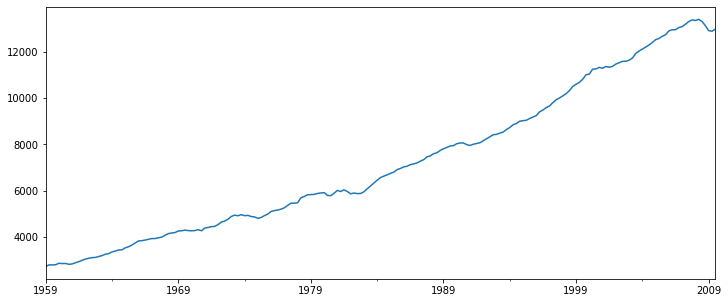

In [3]:
df['realgdp'].plot(figsize = (12,5));

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter


In [5]:
gdp_cycle,gdp_trend = hpfilter(df['realgdp'])

In [40]:
df['realgdp']

1959-03-31     2710.349
1959-06-30     2778.801
1959-09-30     2775.488
1959-12-31     2785.204
1960-03-31     2847.699
                ...    
2008-09-30    13324.600
2008-12-31    13141.920
2009-03-31    12925.410
2009-06-30    12901.504
2009-09-30    12990.341
Name: realgdp, Length: 203, dtype: float64

In [41]:
2710.349/1601

1.6929100562148658

In [6]:
gdp_cycle

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
                  ...    
 2008-09-30    102.018455
 2008-12-31   -107.269472
 2009-03-31   -349.047706
 2009-06-30   -397.557073
 2009-09-30   -333.115243
 Name: realgdp_cycle, Length: 203, dtype: float64, 1959-03-31     2670.837085
 1959-06-30     2698.712468
 1959-09-30     2726.612545
 1959-12-31     2754.612067
 1960-03-31     2782.816333
                   ...     
 2008-09-30    13222.581545
 2008-12-31    13249.189472
 2009-03-31    13274.457706
 2009-06-30    13299.061073
 2009-09-30    13323.456243
 Name: realgdp_trend, Length: 203, dtype: float64)

In [39]:
gdp_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
                  ...     
2008-09-30    13222.581545
2008-12-31    13249.189472
2009-03-31    13274.457706
2009-06-30    13299.061073
2009-09-30    13323.456243
Name: realgdp_trend, Length: 203, dtype: float64

In [7]:
type(gdp_cycle)

pandas.core.series.Series

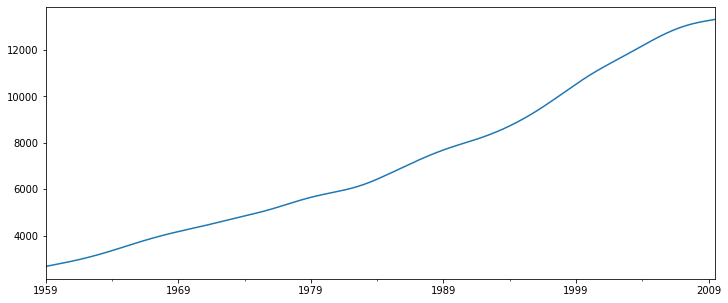

In [8]:
gdp_trend.plot(figsize=(12,5));

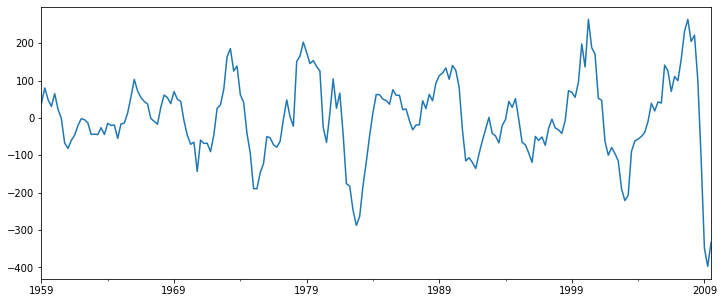

In [9]:
gdp_cycle.plot(figsize=(12,5));

In [10]:
df['trend'] = gdp_trend
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,13222.581545
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,13249.189472
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,13274.457706
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,13299.061073


<AxesSubplot:>

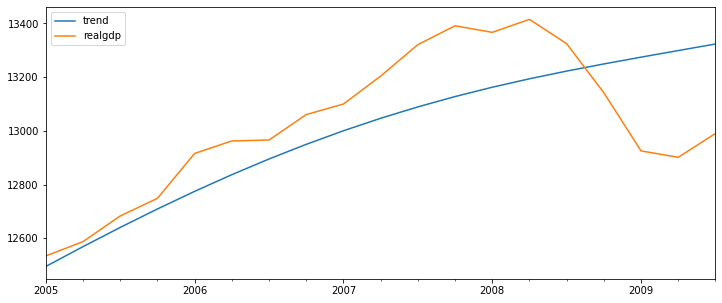

In [11]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

# ETS

In [12]:
data = pd.read_csv('Data/airline_passengers.csv',index_col=0,parse_dates=True)
data

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [15]:
data.shape

(144, 1)

In [16]:
data.isna().sum()

Thousands of Passengers    0
dtype: int64

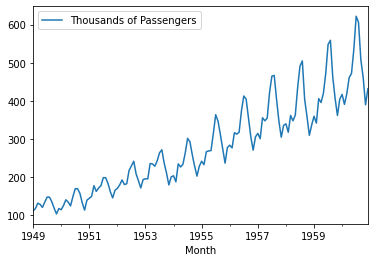

In [13]:
data.plot();

In [17]:
# mutliplicative model as we can see trend is increasing non-linearly
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Thousands of Passengers'],model='multiplicative')

In [35]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [19]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [28]:
result.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

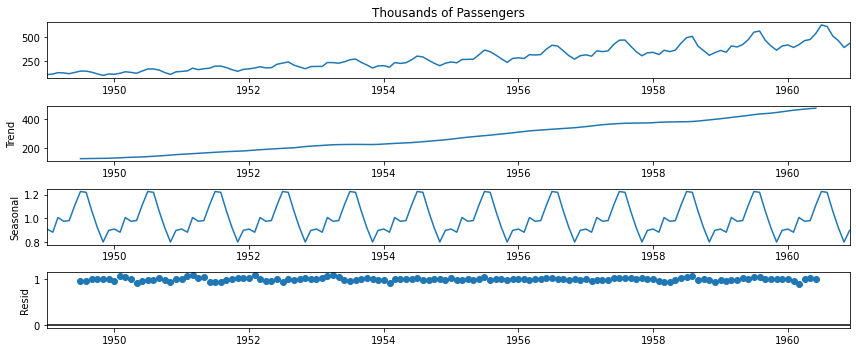

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot();